<a href="https://colab.research.google.com/github/Abrartintoiya018/Genrative_AI_project/blob/main/Convolutuiondemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install Pillow

In [6]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

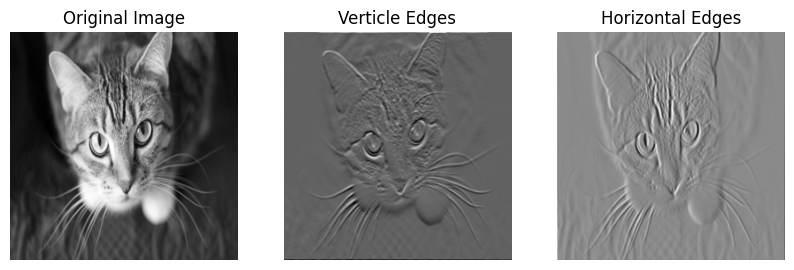

In [7]:
# Load on image using PIL
image = Image.open('catsample.jpg').convert("L") ## Load on grayscale
image = image.resize((256, 256)) ## resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0 ## convert to numpy array and normalize

# add batch and channel dimension (1,256,256,1)
image = np.expand_dims(image, axis=(0, -1))

#define verticle and horizental edge detection filters (Sobel-like)
verticle_filter = np.array([[-1, -2, -1],
                            [0, 0, 0],
                            [1, 2, 1]],dtype=np.float32)

horizontal_filter = np.array([[-1, 0, 1],
                               [-2, 0, 2],
                               [-1, 0, 1]],dtype=np.float32)

# reshape filters for Tensorflow (H, W, in_channels , out_channels)
verticle_filter = np.expand_dims(verticle_filter, axis=(2, 3)) # Corrected reshaping
horizontal_filter = np.expand_dims(horizontal_filter, axis=(2, 3)) # Corrected reshaping

# Apply convolution
verticle_edges = tf.nn.conv2d(image, verticle_filter, strides=[1, 1, 1, 1], padding='SAME')
horizontal_edges = tf.nn.conv2d(image, horizontal_filter, strides=[1, 1, 1, 1], padding='SAME')

# convert tensors to numpy for visualization
verticle_edges = verticle_edges.numpy().squeeze()
horizontal_edges = horizontal_edges.numpy().squeeze()

#Plot original and filtered images
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(verticle_edges, cmap='gray')
plt.title('Verticle Edges')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(horizontal_edges, cmap='gray')
plt.title('Horizontal Edges')
plt.axis('off')

plt.show()

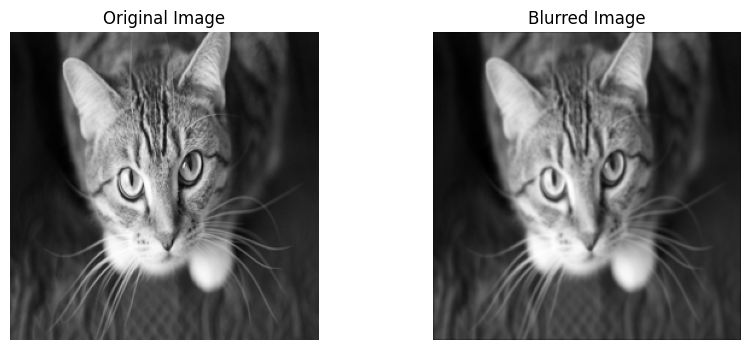

In [8]:
## for blurring image

blur_filter = np.array([
                        [1, 2, 1],
                        [2, 4, 2],
                        [1, 2, 1]], dtype=np.float32)
#reshape
blur_filter = np.expand_dims(blur_filter, axis=(2, 3))
#apply convolution
blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1, 1, 1, 1], padding='SAME')

# convert tensor to numpy
blurred_image = blurred_image.numpy().squeeze()

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(image.squeeze(), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()


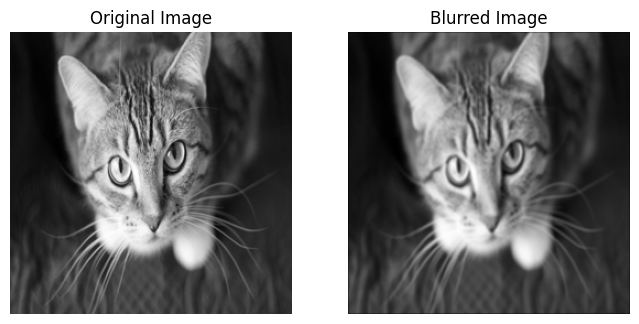

In [11]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load an image using PIL
image = Image.open("catsample.jpg").convert("L")  # Convert to grayscale
image = image.resize((256, 256))  # Resize for simplicity
image = np.array(image, dtype=np.float32) / 255.0  # Normalize to range [0,1]

# Add batch and channel dimensions (1, 256, 256, 1)
image = np.expand_dims(image, axis=(0, -1))

# Define a 3x3 blurring filter (averaging kernel)
blur_filter = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

# Reshape the filter for TensorFlow (H, W, in_channels, out_channels)
blur_filter = blur_filter.reshape(3, 3, 1, 1)

# Apply convolution for blurring
blurred_image = tf.nn.conv2d(image, blur_filter, strides=[1, 1, 1, 1], padding="SAME")

# Convert tensor to numpy for visualization
blurred_image = blurred_image.numpy().squeeze()

# Plot original and blurred images
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(image.squeeze(), cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap="gray")
plt.title("Blurred Image")
plt.axis("off")

plt.show()

